# About this Notebook

This notebook has been included to demonstrate how we might have used DBSCAN, and also show why we chose to use KMeans instead.

As we mention in our report, the main draw back to DBSCAN was the fact it was very sensitve to different splits of data, with its transductive nature being able to be overcome.

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os

# Generate Video Names

Useful for generating the .txt files for batch feature extraction. Eg SumMe.txt and TVSum.txt.

In [2]:
allNames = []

# SumMe
print("SumMe")
rootdir = './../../2FPS_Videos/2FPS_SumMe/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".mp4"):
            print (os.path.join(subdir, file))
            allNames.append(os.path.join(subdir, file))
            
# TVSum
print("TVSum")
rootdir = './../../2FPS_Videos/2FPS_TVSum/video/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".mp4"):
            print (os.path.join(subdir, file))
            allNames.append(os.path.join(subdir, file))

SumMe
./../../2FPS_Videos/2FPS_SumMe/2_fps_paluma_jump.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Base_jumping.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Scuba.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_car_over_camera.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Fire_Domino.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Cooking.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Cockpit_Landing.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Notre_Dame.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Valparaiso_Downhill.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Air_Force_One.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Car_railcrossing.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Bus_in_Rock_Tunnel.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_St_Maarten_Landing.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Kids_playing_in_leaves.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Bike_Polo.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Paintball.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Excavators_river_crossing.mp4
./../../2FPS_Videos/2FPS_SumMe/2_fps_Playing_

# Load Features

In [29]:
# SumMe
def sumMeFeaturesLoad(reshape=True,log=True,feats="2D"):
    
    if (feats == "1024D"):
        rootdir = './dsnet_feature_extraction/features/SumMe'
    elif (feats == "2D"):
        rootdir = './dsnet_feature_extraction/features/2D/SumMe'
    features = []
    filenames = []

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".npy"):
                feature_Vector = np.load( os.path.join(subdir, file) )
                if (log):
                    print ("Loaded feautres from " + str(os.path.join(subdir, file)) + " [shape = " + str(feature_Vector.shape) + "]")
                features.append(feature_Vector)
                filenames.append(os.path.join(subdir, file))

    features = np.asarray(features)
    filenames = np.asarray(filenames)
    if (reshape):
        features = features.reshape(features.shape[0],features.shape[2])
    print("Shape of returned features: " + str(features.shape))
    return features, filenames

# TVSum
def tvSumFeaturesLoad(reshape=True,log=True,feats="2D"):
    
    if (feats == "1024D"):
        rootdir = './dsnet_feature_extraction/features/TVSum'
    elif (feats == "2D"):
        rootdir = './dsnet_feature_extraction/features/2D/TVSum'
    filenames = []
    features = []

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".npy"):
                feature_Vector = np.load( os.path.join(subdir, file) )
                if (log):
                    print ("Loaded feautres from " + str(os.path.join(subdir, file)) + " [shape = " + str(feature_Vector.shape) + "]")
                features.append(feature_Vector)
                filenames.append(os.path.join(subdir, file))

    features = np.asarray(features)
    filenames = np.asarray(filenames)
    if (reshape):
        features = features.reshape(features.shape[0],features.shape[2])
    print("Shape of returned features: " + str(features.shape))
    return features, filenames

In [30]:
# 2D
sumMeFeatures, sumMeAssociatedFileNames = sumMeFeaturesLoad(reshape=False,log=False,feats="2D")
tvSumFeatures, tsAssociatedFileNames = tvSumFeaturesLoad(reshape=False,log=False,feats="2D")

Shape of returned features: (25, 2)
Shape of returned features: (50, 2)


# Visualisation in 2D space

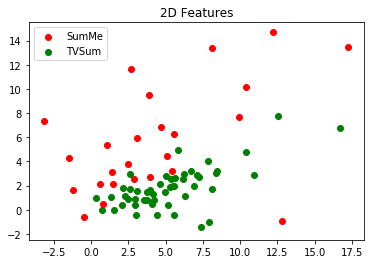

In [31]:
features = np.concatenate((sumMeFeatures,tvSumFeatures))

# Red points are from SumMe, Green are from TVSum
plt.scatter(x=features[:25,0],y=features[:25,1],c='r',label='SumMe')
plt.scatter(x=features[25:,0],y=features[25:,1],c='g',label='TVSum')
plt.title('2D Features')
plt.legend()

plt.show()

# Clustering

n: 75, d: 2
[ 0 -1 -1 -1  0  0  0  0  0 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1
 -1  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
 -1  0  0]
1


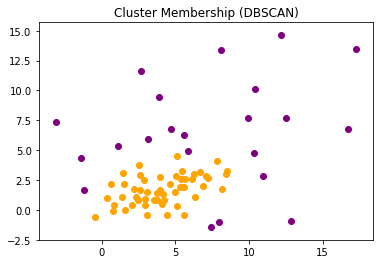

[0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0]
(2, 2)
(75,)


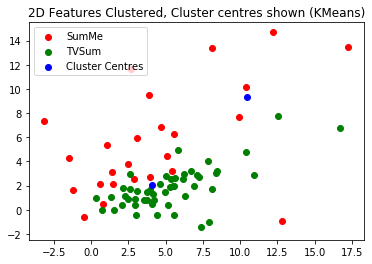

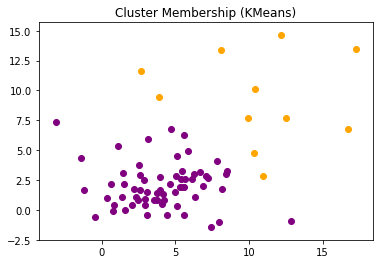

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Testing SumMe and TVSum
features = np.concatenate((sumMeFeatures,tvSumFeatures))

n, d = features.shape
print("n: " + str(n) + ", d: " + str(d))

# # Trying to work out optimal parameters
# values = np.zeros( ( len(range(1,250,1)),len(range(0,16)) ) )
# for i, e in enumerate(range(1,250,1)):
#     for j, ms in enumerate(range(0,16)):
#         db = DBSCAN(eps=e, min_samples=(ms/10.0)).fit(features)
        
#         labels = db.labels_
# #         print(labels)
#         unique, counts = np.unique(labels, return_counts=True)
#         if (len(unique) >= 3 and len(unique) <= 5):
#             values[i,j] = 1
# #         metric = (counts - (counts.sum() / float(len(unique)))).mean()
# #         values[i,j] = metric

# print(values)
# ind = (values > 3)
# print(values[ind])

#DBSCAN

# Run the clustering algo
# - min_samples is minimum members of a cluster
# - eps is the parameter we configure compared to cluster no.

# db = DBSCAN(eps=13.0, min_samples=2).fit(features)
db = DBSCAN(eps=1.5, min_samples=5).fit(features)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_db = db.labels_
print(labels_db)
label_to_plot = labels_db

# For video name extraction
labelsFromDB = label_to_plot

# # Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(n_clusters)

# Ideally generate an array of n_clusters colours
colors = ['orange','r', 'g', 'b','y','m','purple']
for i in range(len(features)):
    
    plt.scatter(x=features[i,0],y=features[i,1],c=colors[label_to_plot[i]])

plt.title('Cluster Membership (DBSCAN)')
plt.show()

# KMeans
# Make the model and fit to data

KM_model = KMeans(n_clusters=2)
km = KM_model.fit(features)

labels = km.labels_
print(labels)
print(km.cluster_centers_.shape)
clusterCentres = km.cluster_centers_

# label_to_plot = labels
label_to_plot = km.fit_predict(features)
print(label_to_plot.shape)

# For video name extraction
labelsFromKM = label_to_plot

# From PCA earlier
# Red points are from SumMe, Green are from TVSum
plt.scatter(x=features[:25,0],y=features[:25,1],c='r',label='SumMe')
plt.scatter(x=features[25:,0],y=features[25:,1],c='g',label='TVSum')
plt.scatter(x=clusterCentres[:,0],y=clusterCentres[:,1],c='b',label='Cluster Centres')
plt.title('2D Features Clustered, Cluster centres shown (KMeans)')
plt.legend()

plt.show()

# Ideally generate an array of n_clusters colours
colors = ['orange','purple','r', 'g', 'b','y','m']
for i in range(len(features)):
    
    plt.scatter(x=features[i,0],y=features[i,1],c=colors[label_to_plot[i]])

plt.title('Cluster Membership (KMeans)')
plt.show()

# Making DBSCAN Inductive

We use code adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html to show how we can train a classifier model to classify the classes generated by our DBSCAN clustering. We can then use this model to classify unseen data points into one of our original clusters.

(10, 2)


/local/java/python-pip-packages.cs342/lib64/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


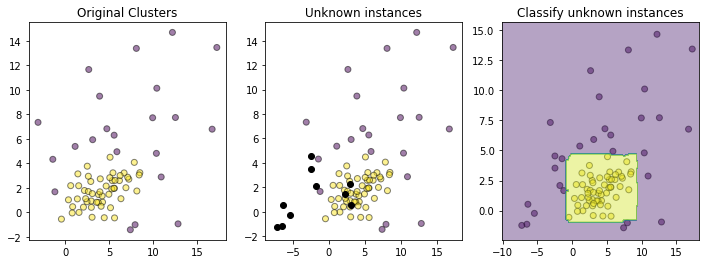

In [33]:

from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
# from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted

from sklearn.neighbors import KNeighborsClassifier

N_SAMPLES = 5000
RANDOM_STATE = 42

def _classifier_has(attr):
    """Check if we can delegate a method to the underlying classifier.

    First, we check the first fitted classifier if available, otherwise we
    check the unfitted classifier.
    """
    return lambda estimator: (
        hasattr(estimator.classifier_, attr)
        if hasattr(estimator, "classifier_")
        else hasattr(estimator.classifier, attr)
    )


class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

#     @available_if(_classifier_has("predict"))
    def predict(self, X):
        return self.classifier_.predict(X)

#     @available_if(_classifier_has("decision_function"))
    def decision_function(self, X):
        return self.classifier_.decision_function(X)


def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")


# Generate some training data from clustering
X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)


# Train a clustering algorithm on the training data and get the cluster labels
clusterer = AgglomerativeClustering(n_clusters=3)
clusterer = db
cluster_labels = db.labels_

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_scatter(features, cluster_labels)
plt.title("Original Clusters")


# Generate new samples and plot them along with the original dataset
X_new, y_new = make_blobs(
    n_samples=10, centers=[(-7, -1), (-2, 4), (4, 2)], random_state=RANDOM_STATE
)

print(X_new.shape)

plt.subplot(132)
plot_scatter(features, cluster_labels)
plot_scatter(X_new, "black", 1)
plt.title("Unknown instances")


# Declare the inductive learning model that it will be used to
# predict cluster membership for unknown instances
classifier = RandomForestClassifier(random_state=RANDOM_STATE)
inductive_learner = InductiveClusterer(clusterer, classifier).fit(features)

probable_clusters = inductive_learner.predict(X_new)


plt.subplot(133)
plot_scatter(features, cluster_labels)
plot_scatter(X_new, probable_clusters)

# Plotting decision regions
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
# Quick hack on the decision plotting range
xx, yy = np.meshgrid(np.arange(x_min-6, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = inductive_learner.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.title("Classify unknown instances")

plt.show()

# Clustering with PCA

Instead of our auto encoder reduced features, we also show how PCA decomposition compares.

# Plotting the top 2 PCs (Non-2D Features)

Shape of returned features: (25, 1024)
Shape of returned features: (50, 1024)
(75, 2)


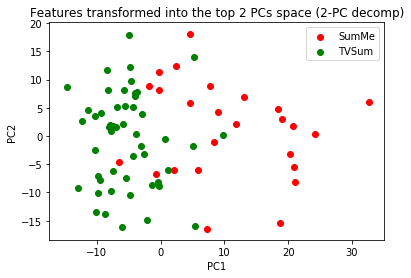

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading 1024D Features this time, not 2D
sumMeFeatures, sumMeAssociatedFileNames = sumMeFeaturesLoad(log=False,feats="1024D")
tvSumFeatures, tsAssociatedFileNames = tvSumFeaturesLoad(log=False,feats="1024D")
features = np.concatenate((sumMeFeatures,tvSumFeatures))

centered_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
Z_2 = pca.fit_transform(centered_features)
print(Z_2.shape)

colors = ['r', 'g']
# Red points are from SumMe, Green are from TVSum
plt.scatter(x=Z_2[:25,0],y=Z_2[:25,1],c='r',label='SumMe')
plt.scatter(x=Z_2[25:,0],y=Z_2[25:,1],c='g',label='TVSum')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Features transformed into the top 2 PCs space (2-PC decomp)')
plt.legend()

plt.show()

# Clustering in PC space

[-1  0  0 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1
 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1 -1  0  0  0  0  0
  0 -1  0 -1  0  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0  0  0  0  0
 -1  0  0]
1
(75,)


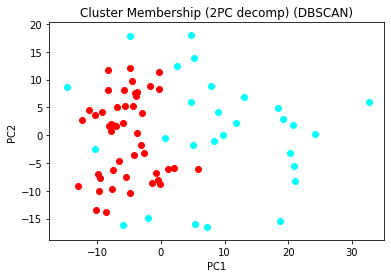

[0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1]
(2, 2)


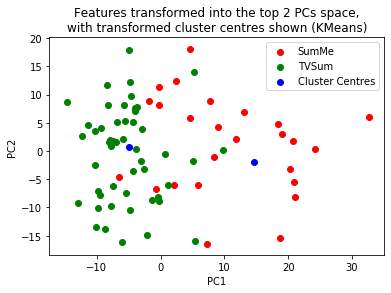

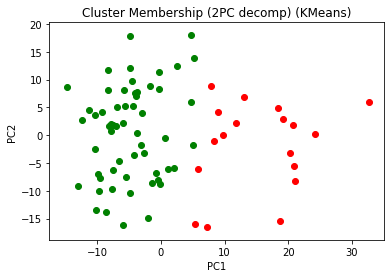

In [35]:
# DBSCAN

db = DBSCAN(eps=4, min_samples=5).fit(Z_2)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_db = db.labels_
print(labels_db)
# # Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(n_clusters)

label_to_plot = labels_db
print(label_to_plot.shape)

# Ideally generate an array of n_clusters colours
colors = ['r', 'g', 'b','y','m','lime','cyan']
for i in range(len(Z_2)):
    
    plt.scatter(x=Z_2[i,0],y=Z_2[i,1],c=colors[label_to_plot[i]])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Membership (2PC decomp) (DBSCAN)')
plt.show()

# KMeans

KM_model = KMeans(n_clusters=2)
km = KM_model.fit(Z_2)

labels = km.labels_
print(labels)
print(km.cluster_centers_.shape)

cluster_centres = km.cluster_centers_
label_to_plot = km.fit_predict(Z_2)

plt.scatter(x=Z_2[:25,0],y=Z_2[:25,1],c='r',label='SumMe')
plt.scatter(x=Z_2[25:,0],y=Z_2[25:,1],c='g',label='TVSum')
plt.scatter(x=cluster_centres[:,0],y=cluster_centres[:,1],c='b',label='Cluster Centres')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Features transformed into the top 2 PCs space,\nwith transformed cluster centres shown (KMeans)')
plt.legend()

plt.show()

# Ideally generate an array of n_clusters colours
colors = ['r', 'g', 'b','y','m','lime','cyan']
for i in range(len(Z_2)):
    
    plt.scatter(x=Z_2[i,0],y=Z_2[i,1],c=colors[label_to_plot[i]])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Membership (2PC decomp) (KMeans)')
plt.show()

# Video Names per cluster

An example of how we can use these clusters to extract the video names in each cluster. These can then be used to analyise why each video is in each cluster.

In [36]:
def namesPerCluster(data,predictedLabels):
    
    labels = np.unique(predictedLabels)
    
    namesPerCluster = []
    allFileNames = np.concatenate((sumMeAssociatedFileNames, tsAssociatedFileNames))

    nameExtractor = lambda s: "2_fps" + s[s.find("2_fps")+len("2_fps"):s.rfind(".mp4")] + ".mp4"
    fileNamesOnly = np.array(list(map(nameExtractor,allFileNames)))

    for l in labels:

        namesPerCluster.append([l,fileNamesOnly[(predictedLabels == l)]])

    return namesPerCluster

In [37]:
out = namesPerCluster(features,labelsFromDB) # From auto encoder reduced clustering
print(out)

[[-1, array(['2_fps_Cooking.mp4', '2_fps_Bike_Polo.mp4', '2_fps_Scuba.mp4',
       '2_fps_Valparaiso_Downhill.mp4', '2_fps_Uncut_Evening_Flight.mp4',
       '2_fps_St_Maarten_Landing.mp4', '2_fps_Notre_Dame.mp4',
       '2_fps_Saving_dolphines.mp4', '2_fps_Paintball.mp4',
       '2_fps_car_over_camera.mp4', '2_fps_Car_railcrossing.mp4',
       '2_fps_Bus_in_Rock_Tunnel.mp4', '2_fps_Fire_Domino.mp4',
       '2_fps_Base_jumping.mp4', '2_fps_Jumps.mp4',
       '2_fps_AwmHb44_ouw.mp4', '2_fps_b626MiF1ew4.mp4',
       '2_fps_xxdtq8mxegs.mp4', '2_fps_sTEELN-vY30.mp4',
       '2_fps_EYqVtI9YWJA.mp4', '2_fps__xMr-HKMfVA.mp4',
       '2_fps_HT5vyqe0Xaw.mp4'], dtype='<U35')], [0, array(['2_fps_Air_Force_One.mp4', '2_fps_Excavators_river_crossing.mp4',
       '2_fps_Playing_on_water_slide.mp4', '2_fps_paluma_jump.mp4',
       '2_fps_Cockpit_Landing.mp4', '2_fps_Bearpark_climbing.mp4',
       '2_fps_Statue_of_Liberty.mp4', '2_fps_Kids_playing_in_leaves.mp4',
       '2_fps_playing_ball.mp4', '2_fps